## Importing Libraries

In [880]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import CountEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

## Importing Data

In [824]:
books = pd.read_csv("data/books.csv", sep=";", encoding="latin-1", low_memory=False, on_bad_lines='skip').drop(["Image-URL-S", "Image-URL-M", "Image-URL-L"], axis=1)
ratings = pd.read_csv("data/ratings.csv", sep=";", encoding="latin-1", low_memory=False, on_bad_lines='skip')
users = pd.read_csv("data/users.csv", sep=";", encoding="latin-1", low_memory=False, on_bad_lines='skip')

## Cleaning Data

In [825]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [826]:
books[books["Book-Author"].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [827]:
books[books["Publisher"].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [828]:
books = books.dropna()

---

In [829]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


---

In [830]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [831]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [832]:
users["Age"] = users["Age"].fillna(users["Age"].median())

---

In [833]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [834]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [835]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",32.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",32.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",32.0


## Merging Dataframes

In [836]:
users_ratings = pd.merge(users, ratings, on="User-ID", how="inner")
books_users_ratings = pd.merge(books, users_ratings, on="ISBN", how="inner")
df = books_users_ratings.copy()

In [837]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,"ottawa, ontario, canada",49.0,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,"n/a, n/a, n/a",32.0,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,"sudbury, ontario, canada",32.0,0


---

### Idea

We will make a book recommendation system based in the user's last read books. Our final objective is to recommend 10 books for each person. For this, we will first clusterize the books after making a PCA (Principal Component Analysis) considering some characteristics:

- Year of Publication
- Mean Age of Readers by Book
- Mean Age of Readers by Author
- Mean Age of Readers by Publisher
- Mean Rating by Book
- Mean Rating by Author
- Mean Rating by Publisher
- Top Location by Book (Count Encoded) - where the book has been more read
- Book Contribution to Top Location - what is the fraction of readings the book contributed to in its top place
- Book Author (Count Encoded)
- Publisher (Count Encoded)
- Book Appearance (Count encoding of ISBN)

Then, we will recommend numbers of books of the clusters which have books the person already read using K-Nearest Neighbors. Each number will depend on the proportion of books of each cluster the person has read. If it's not possible to complete the 10 books with this technique, books from other clusters will be recommended - in this case, clusters close to the ones from which the books the person read come from will be chosen. 

## Data Preprocessing

In [838]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031132 entries, 0 to 1031131
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031132 non-null  object 
 1   Book-Title           1031132 non-null  object 
 2   Book-Author          1031132 non-null  object 
 3   Year-Of-Publication  1031132 non-null  object 
 4   Publisher            1031132 non-null  object 
 5   User-ID              1031132 non-null  int64  
 6   Location             1031132 non-null  object 
 7   Age                  1031132 non-null  float64
 8   Book-Rating          1031132 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 70.8+ MB


### Dropping Strange Years Of Publication and Converting to Int

In [839]:
df = df[df["Year-Of-Publication"].str.isnumeric()]
df["Year-Of-Publication"] = df["Year-Of-Publication"].apply(lambda x: int(x))

### Mean Ages and Ratings

In [840]:
mean_age_by_book = df.groupby("Book-Title")["Age"].mean().rename("Mean-Age-By-Book")
df = pd.merge(df, mean_age_by_book, on="Book-Title", how="inner")

In [841]:
mean_age_by_author = df.groupby("Book-Author")["Age"].mean().rename("Mean-Age-By-Author")
df = pd.merge(df, mean_age_by_author, on="Book-Author", how="inner")

In [842]:
mean_age_by_publisher = df.groupby("Publisher")["Age"].mean().rename("Mean-Age-By-Publisher")
df = pd.merge(df, mean_age_by_publisher, on="Publisher", how="inner")

In [843]:
mean_rating_by_book = df.groupby("Book-Title")["Book-Rating"].mean().rename("Mean-Rating-By-Book")
df = pd.merge(df, mean_rating_by_book, on="Book-Title", how="inner")

In [844]:
mean_rating_by_author = df.groupby("Book-Author")["Book-Rating"].mean().rename("Mean-Rating-By-Author")
df = pd.merge(df, mean_rating_by_author, on="Book-Author", how="inner")

In [845]:
mean_rating_by_publisher = df.groupby("Publisher")["Book-Rating"].mean().rename("Mean-Rating-By-Publisher")
df = pd.merge(df, mean_rating_by_publisher, on="Publisher", how="inner")

In [846]:
df = df.drop(["Age", "Book-Rating", "User-ID", "Book-Title"], axis=1)

### Top Location By Book

In [847]:
location_count_by_book = df.groupby(["ISBN", "Location"]).size().reset_index(name="Readers-Count-In-Top-Location")
top_location_by_book = location_count_by_book.loc[location_count_by_book.groupby("ISBN")["Readers-Count-In-Top-Location"].idxmax()].rename({"Location": "Top-Location-By-Book"}, axis=1)
df = pd.merge(df, top_location_by_book, on="ISBN", how="inner")

### Count Encodings

In [848]:
location_encoder = CountEncoder()
df["Location-Encoded"] = location_encoder.fit_transform(df["Location"])

In [849]:
location_encodings = df.groupby(["Location"])["Location-Encoded"].max().rename("Top-Location-By-Book-Encoded")
df = df.drop(["Location-Encoded"], axis=1)
df = pd.merge(df, location_encodings, left_on="Top-Location-By-Book", right_on="Location", how="inner")

In [850]:
df = df.drop(["Location", "Top-Location-By-Book"], axis=1)

In [851]:
author_encoder = CountEncoder()
df["Book-Author-Encoded"] = author_encoder.fit_transform(df["Book-Author"])
df = df.drop(["Book-Author"], axis=1)

In [852]:
publisher_encoder = CountEncoder()
df["Publisher-Encoded"] = publisher_encoder.fit_transform(df["Publisher"])
df = df.drop(["Publisher"], axis=1)

### Book Contribution to Top Location

In [853]:
df["Book-Contribution-To-Top-Location"] = df["Readers-Count-In-Top-Location"]/df["Top-Location-By-Book-Encoded"]

df = df.drop(["Readers-Count-In-Top-Location"], axis=1)

### Book Appearance

In [854]:
isbn_encoder = CountEncoder()
df["Book-Appearance"] = isbn_encoder.fit_transform(df["ISBN"])

### Dropping duplicates

In [855]:
df = df.drop_duplicates()

In [856]:
df.head()

,ISBN,Year-Of-Publication,Mean-Age-By-Book,Mean-Age-By-Author,Mean-Age-By-Publisher,Mean-Rating-By-Book,Mean-Rating-By-Author,Mean-Rating-By-Publisher,Top-Location-By-Book-Encoded,Book-Author-Encoded,Publisher-Encoded,Book-Contribution-To-Top-Location,Book-Appearance
0,0195153448,2002,24.000,24.000000,34.682643,3.500,3.500000,3.496732,245,2,2754,0.004082,1
1,0764500546,1996,28.500,28.500000,36.338095,5.000,5.000000,3.347619,245,2,630,0.004082,1
2,0060907924,1980,52.000,31.305085,37.791306,10.000,3.644068,2.626382,245,59,6694,0.004082,1
3,0425173305,2000,32.875,33.357143,36.940554,4.625,5.071429,2.424827,245,14,28614,0.004082,3
6,0345391497,1997,32.000,30.690554,36.394597,0.000,3.289902,2.801204,245,307,34724,0.004082,1


### Scaling Data

In [857]:
X = df.drop(["ISBN"], axis=1)

In [858]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [859]:
len(X.columns)

12

## PCA (Principal Component Analysis)

In [877]:
pca = PCA(n_components=0.95)
X_reduced_pca = pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [878]:
d

10

We couldn't eliminate many variables with PCA. We will, then maintain the original ones. This probably means that we have many uncorrelated variables, which is good. Let's see:

<Axes: >

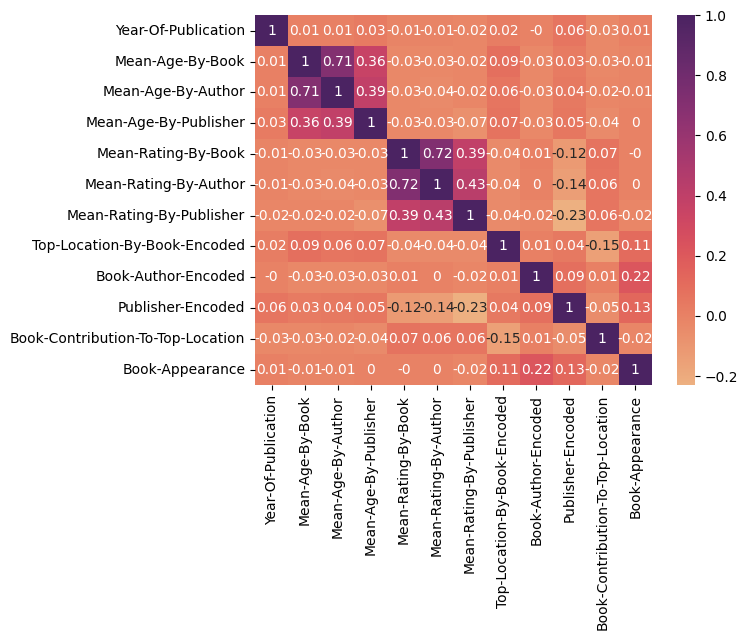

In [890]:
sns.heatmap(X.corr().apply(lambda x: round(x,2)), cmap="flare", annot=True)